# Breast Cancer Prediction using Supervised Learning

## Project Overview
This project implements machine learning algorithms to classify breast cancer tumors as benign or malignant using the Wisconsin Breast Cancer (Diagnostic) Dataset. We compare three supervised learning algorithms:
- **Support Vector Machine (SVM)**
- **Logistic Regression** 
- **Random Forest**

## Objectives
1. Perform comprehensive exploratory data analysis with visualizations
2. Train and evaluate three different ML models
3. Compare model performance using multiple metrics
4. Analyze feature importance and correlations
5. Create insightful visualizations for results interpretation

## 1. Import Libraries and Setup

In [2]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report, 
                           confusion_matrix, roc_curve, auc, roc_auc_score)
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Data Loading and Initial Exploration

In [3]:
# Load the breast cancer dataset
cancer_data = load_breast_cancer()

# Create a DataFrame
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df['target'] = cancer_data.target

# Basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nTarget Value Counts:")
print(df['target'].value_counts())
print("\nTarget Labels:")
print("0: Malignant")
print("1: Benign")

# Basic statistics
print("\nBasic Dataset Info:")
print(f"Total samples: {len(df)}")
print(f"Features: {len(cancer_data.feature_names)}")
print(f"Malignant cases: {(df['target'] == 0).sum()}")
print(f"Benign cases: {(df['target'] == 1).sum()}")
print(f"Malignant percentage: {((df['target'] == 0).sum() / len(df)) * 100:.2f}%")
print(f"Benign percentage: {((df['target'] == 1).sum() / len(df)) * 100:.2f}%")

# Display first few rows
print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (569, 31)

Target Value Counts:
target
1    357
0    212
Name: count, dtype: int64

Target Labels:
0: Malignant
1: Benign

Basic Dataset Info:
Total samples: 569
Features: 30
Malignant cases: 212
Benign cases: 357
Malignant percentage: 37.26%
Benign percentage: 62.74%

First 5 rows:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990

## 3. Exploratory Data Analysis with Visualizations

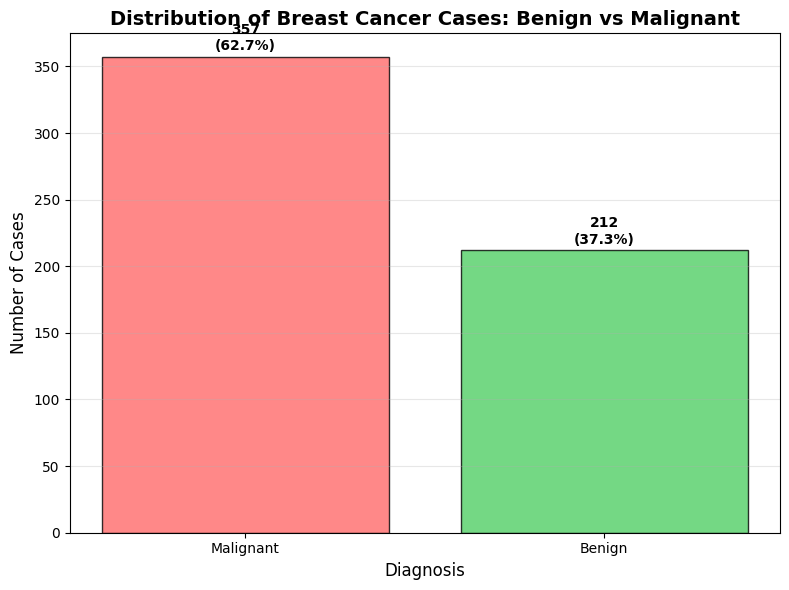

In [4]:
# Visualization 1: Target class distribution
plt.figure(figsize=(8, 6))
target_counts = df['target'].value_counts()
colors = ['#ff6b6b', '#51cf66']
labels = ['Malignant', 'Benign']

plt.bar(labels, target_counts.values, color=colors, alpha=0.8, edgecolor='black')
plt.title('Distribution of Breast Cancer Cases: Benign vs Malignant', fontsize=14, fontweight='bold')
plt.ylabel('Number of Cases', fontsize=12)
plt.xlabel('Diagnosis', fontsize=12)

# Add percentage labels on bars
for i, v in enumerate(target_counts.values):
    percentage = (v / len(df)) * 100
    plt.text(i, v + 5, f'{v}\n({percentage:.1f}%)', ha='center', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [5]:
# Analyze key features by grouping them
features_mean = [col for col in df.columns if 'mean' in col and col != 'target']
features_se = [col for col in df.columns if 'error' in col]
features_worst = [col for col in df.columns if 'worst' in col]

print(f"Feature Categories:")
print(f"Mean features ({len(features_mean)}): {features_mean}")
print(f"Standard Error features ({len(features_se)}): {features_se[:5]}...")
print(f"Worst features ({len(features_worst)}): {features_worst[:5]}...")

# Calculate correlation matrix for mean features
mean_features_df = df[features_mean + ['target']].copy()
correlation_matrix = mean_features_df.corr()

print(f"\nTop features most correlated with target:")
target_corr = correlation_matrix['target'].abs().sort_values(ascending=False)
print(target_corr.iloc[1:6])  # Top 5 excluding target itself

Feature Categories:
Mean features (10): ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']
Standard Error features (10): ['radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error']...
Worst features (10): ['worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness']...

Top features most correlated with target:
mean concave points    0.776614
mean perimeter         0.742636
mean radius            0.730029
mean area              0.708984
mean concavity         0.696360
Name: target, dtype: float64


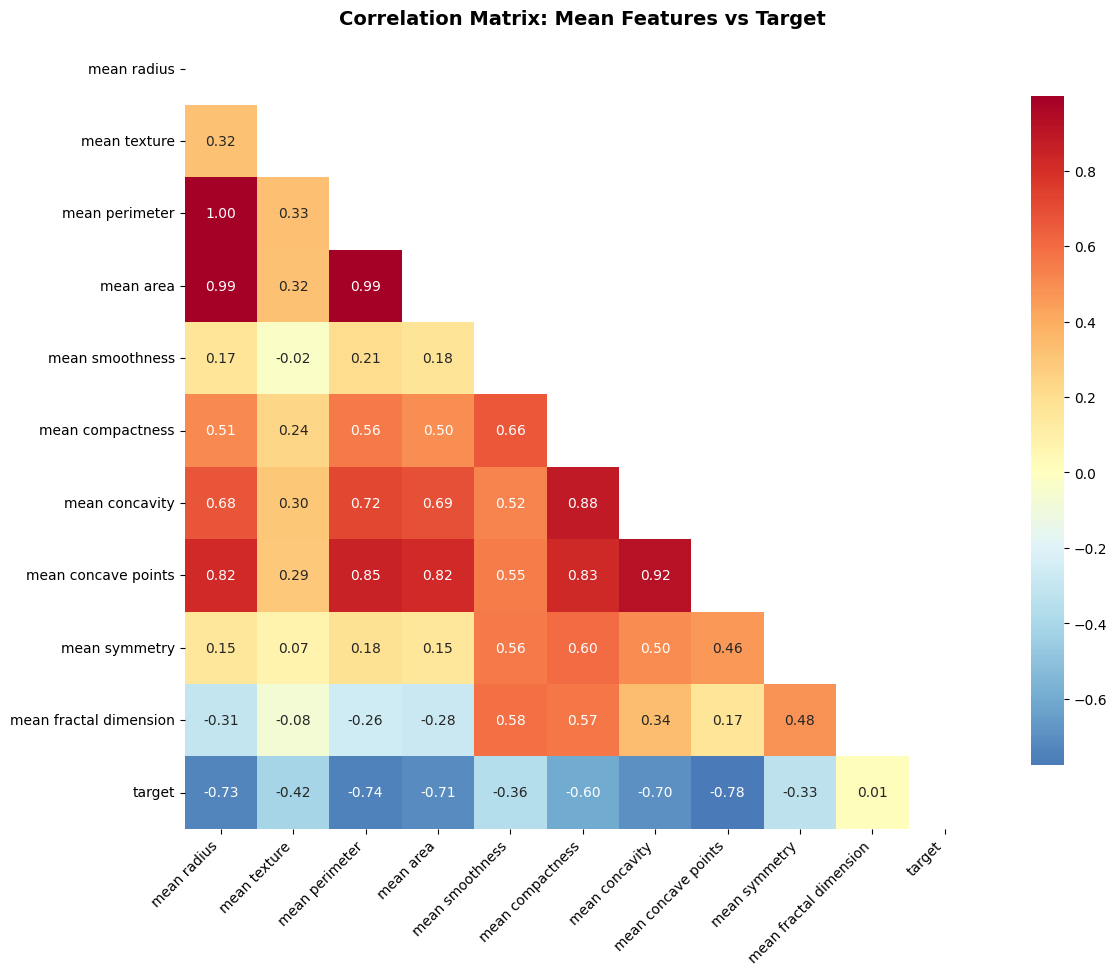

In [6]:
# Visualization 2: Correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(correlation_matrix.corr())
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8}, mask=mask)
plt.title('Correlation Matrix: Mean Features vs Target', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

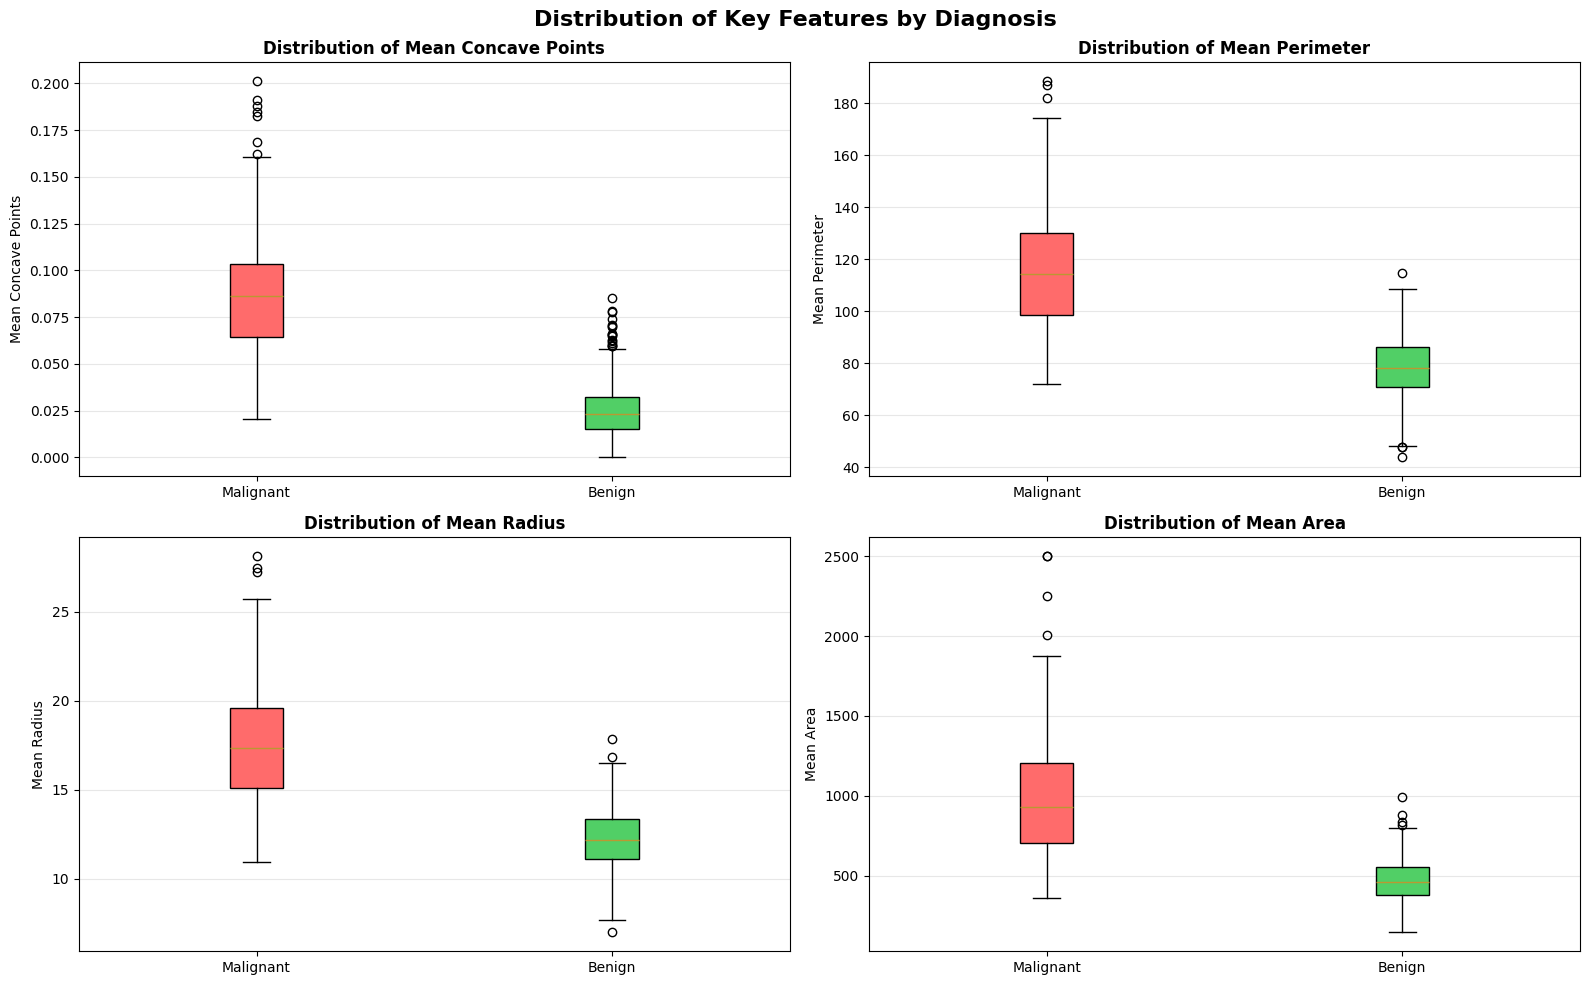

In [7]:
# Visualization 3: Distribution of key features by diagnosis
top_features = ['mean concave points', 'mean perimeter', 'mean radius', 'mean area']

plt.figure(figsize=(16, 10))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 2, i)
    
    # Separate data by diagnosis
    malignant_data = df[df['target'] == 0][feature]
    benign_data = df[df['target'] == 1][feature]
    
    # Create boxplot
    box_data = [malignant_data, benign_data]
    box = plt.boxplot(box_data, labels=['Malignant', 'Benign'], patch_artist=True)
    
    # Color the boxes
    box['boxes'][0].set_facecolor('#ff6b6b')
    box['boxes'][1].set_facecolor('#51cf66')
    
    plt.title(f'Distribution of {feature.title()}', fontweight='bold')
    plt.ylabel(feature.replace('_', ' ').title())
    plt.grid(axis='y', alpha=0.3)

plt.suptitle('Distribution of Key Features by Diagnosis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 4. Data Preprocessing and Model Training

In [8]:
# Prepare features and target
X = df.drop('target', axis=1)
y = df['target']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTrain set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Train target distribution: Malignant={np.sum(y_train==0)}, Benign={np.sum(y_train==1)}")
print(f"Test target distribution: Malignant={np.sum(y_test==0)}, Benign={np.sum(y_test==1)}")

# Scale the features for SVM and Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData preprocessing completed!")
print(f"Scaled training data shape: {X_train_scaled.shape}")

Features shape: (569, 30)
Target shape: (569,)

Train set size: 398
Test set size: 171
Train target distribution: Malignant=148, Benign=250
Test target distribution: Malignant=64, Benign=107

Data preprocessing completed!
Scaled training data shape: (398, 30)


In [9]:
# Initialize the three models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42, probability=True, kernel='rbf'),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

# Train and evaluate each model
results = {}

print("Training and evaluating models...")
print("="*50)

for name, model in models.items():
    print(f"\n{name}:")
    print("-" * 30)
    
    # Use scaled data for SVM and Logistic Regression, original for Random Forest
    if name in ['Logistic Regression', 'SVM']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    # Get classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_proba': y_proba,
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1_score': report['weighted avg']['f1-score']
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"Precision: {report['weighted avg']['precision']:.4f}")
    print(f"Recall: {report['weighted avg']['recall']:.4f}")
    print(f"F1-Score: {report['weighted avg']['f1-score']:.4f}")
    
    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:\n{cm}")

Training and evaluating models...

Logistic Regression:
------------------------------
Accuracy: 0.9883
ROC-AUC: 0.9981
Precision: 0.9883
Recall: 0.9883
F1-Score: 0.9883
Confusion Matrix:
[[ 63   1]
 [  1 106]]

SVM:
------------------------------
Accuracy: 0.9766
ROC-AUC: 0.9978
Precision: 0.9766
Recall: 0.9766
F1-Score: 0.9766
Confusion Matrix:
[[ 62   2]
 [  2 105]]

Random Forest:
------------------------------
Accuracy: 0.9357
ROC-AUC: 0.9913
Precision: 0.9355
Recall: 0.9357
F1-Score: 0.9356
Confusion Matrix:
[[ 58   6]
 [  5 102]]


## 5. Model Performance Visualization and Analysis

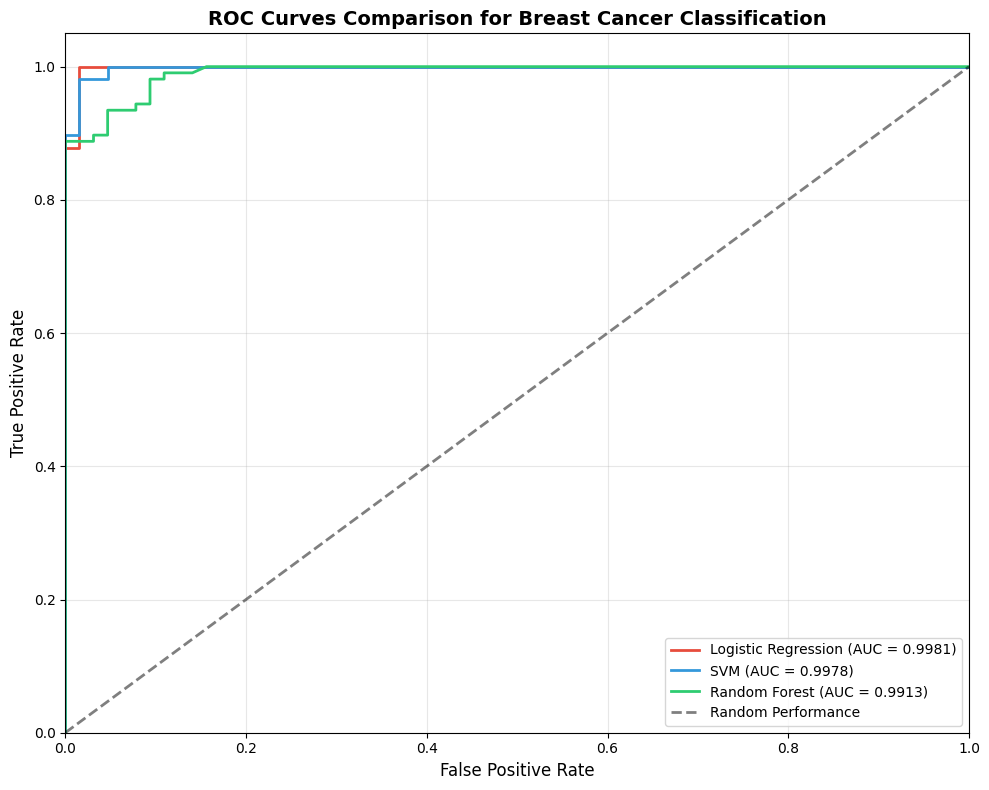

In [10]:
# Visualization 4: ROC Curves Comparison
plt.figure(figsize=(10, 8))

colors = ['#e74c3c', '#3498db', '#2ecc71']
for i, (name, result) in enumerate(results.items()):
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, result['y_proba'])
    
    # Plot ROC curve
    plt.plot(fpr, tpr, color=colors[i], lw=2, 
             label=f'{name} (AUC = {result["roc_auc"]:.4f})')

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', lw=2, alpha=0.5, label='Random Performance')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves Comparison for Breast Cancer Classification', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

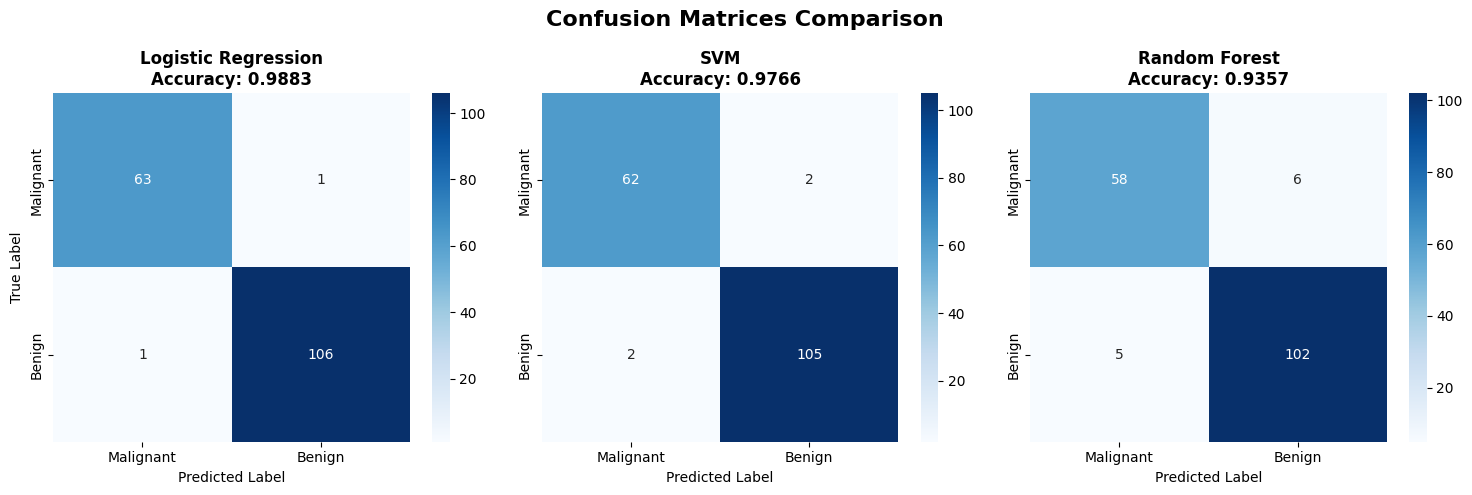

In [11]:
# Visualization 5: Confusion Matrices Comparison
plt.figure(figsize=(15, 5))

for i, (name, result) in enumerate(results.items(), 1):
    plt.subplot(1, 3, i)
    cm = confusion_matrix(y_test, result['y_pred'])
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Malignant', 'Benign'],
                yticklabels=['Malignant', 'Benign'])
    
    plt.title(f'{name}\nAccuracy: {result["accuracy"]:.4f}', fontweight='bold')
    plt.ylabel('True Label' if i == 1 else '')
    plt.xlabel('Predicted Label')

plt.suptitle('Confusion Matrices Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

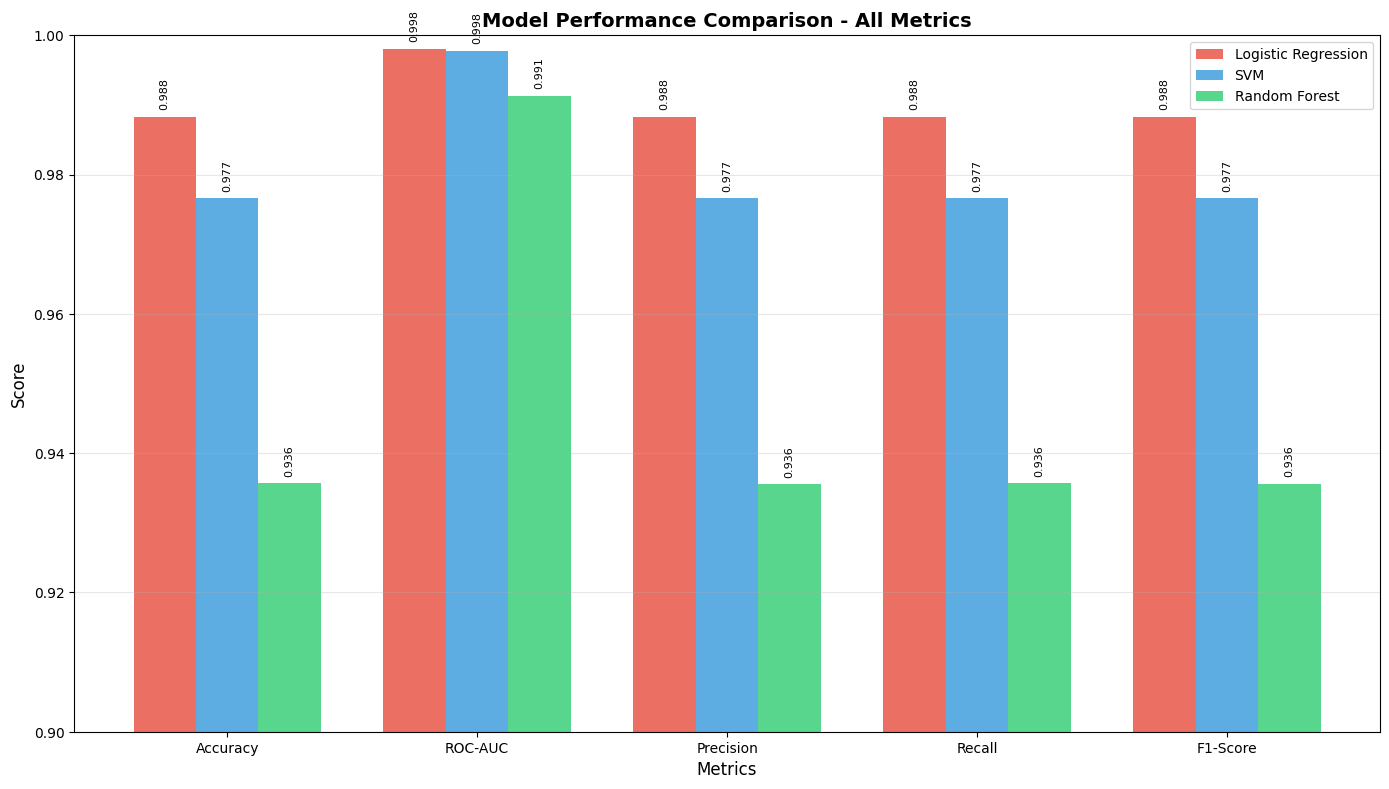

In [12]:
# Visualization 6: Model Performance Comparison
metrics = ['Accuracy', 'ROC-AUC', 'Precision', 'Recall', 'F1-Score']
model_names = list(results.keys())

# Prepare data for plotting
performance_data = []
for name in model_names:
    performance_data.append([
        results[name]['accuracy'],
        results[name]['roc_auc'],
        results[name]['precision'],
        results[name]['recall'],
        results[name]['f1_score']
    ])

# Create grouped bar chart
x = np.arange(len(metrics))
width = 0.25

plt.figure(figsize=(14, 8))
colors = ['#e74c3c', '#3498db', '#2ecc71']

for i, (name, data) in enumerate(zip(model_names, performance_data)):
    plt.bar(x + i*width, data, width, label=name, color=colors[i], alpha=0.8)

plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Model Performance Comparison - All Metrics', fontsize=14, fontweight='bold')
plt.xticks(x + width, metrics)
plt.legend()
plt.ylim(0.9, 1.0)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (name, data) in enumerate(zip(model_names, performance_data)):
    for j, value in enumerate(data):
        plt.text(j + i*width, value + 0.001, f'{value:.3f}', 
                ha='center', va='bottom', fontsize=8, rotation=90)

plt.tight_layout()
plt.show()

## 6. Feature Importance Analysis

In [13]:
# Get feature importance from Random Forest model
rf_model = results['Random Forest']['model']
feature_importance = rf_model.feature_importances_
feature_names = list(X.columns)

# Create feature importance data
importance_data = []
for feature, importance in zip(feature_names, feature_importance):
    importance_data.append({
        'feature': feature,
        'importance': importance
    })

# Sort by importance
importance_data.sort(key=lambda x: x['importance'], reverse=True)

# Show top 15 features
print("Top 15 Most Important Features (Random Forest):")
print("-" * 50)
for i, item in enumerate(importance_data[:15]):
    print(f"{i+1:2d}. {item['feature']:25s}: {item['importance']:.4f}")

Top 15 Most Important Features (Random Forest):
--------------------------------------------------
 1. worst concave points     : 0.1590
 2. worst area               : 0.1470
 3. worst perimeter          : 0.0858
 4. worst radius             : 0.0790
 5. mean radius              : 0.0777
 6. mean perimeter           : 0.0742
 7. mean concave points      : 0.0659
 8. mean concavity           : 0.0543
 9. mean area                : 0.0417
10. worst concavity          : 0.0314
11. worst compactness        : 0.0250
12. area error               : 0.0199
13. worst smoothness         : 0.0142
14. worst texture            : 0.0136
15. mean compactness         : 0.0132


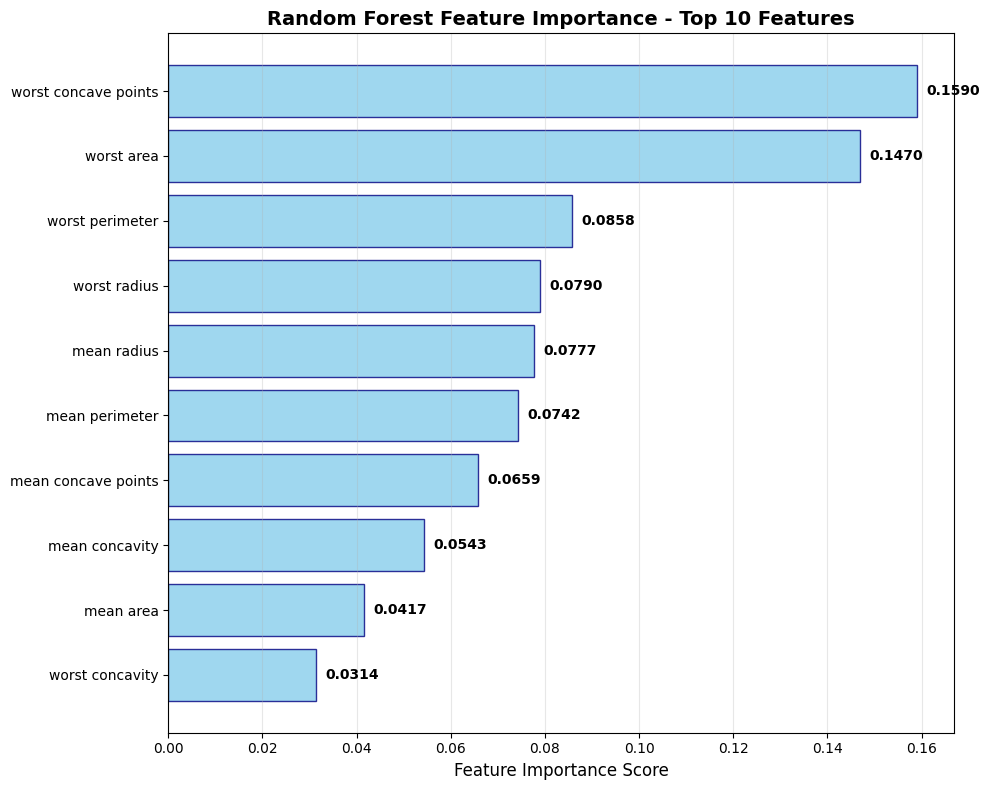

In [14]:
# Visualization 7: Feature Importance Plot
top_10_features = importance_data[:10]
features = [item['feature'] for item in top_10_features]
importances = [item['importance'] for item in top_10_features]

plt.figure(figsize=(10, 8))
bars = plt.barh(range(len(features)), importances, color='skyblue', alpha=0.8, edgecolor='navy')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance Score', fontsize=12)
plt.title('Random Forest Feature Importance - Top 10 Features', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels on bars
for i, (bar, importance) in enumerate(zip(bars, importances)):
    plt.text(importance + 0.002, i, f'{importance:.4f}', 
             va='center', fontsize=10, fontweight='bold')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Cross-Validation Analysis

In [15]:
# Cross-validation scores
print(f"Cross-validation scores (5-fold):")
print("-" * 40)

cv_results = {}
for name, model_class in models.items():
    # Create fresh model instance
    if name == 'Logistic Regression':
        model = LogisticRegression(random_state=42, max_iter=1000)
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    elif name == 'SVM':
        model = SVC(random_state=42, kernel='rbf')
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    else:
        model = RandomForestClassifier(random_state=42, n_estimators=100)
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    cv_results[name] = {
        'mean': cv_scores.mean(),
        'std': cv_scores.std(),
        'scores': cv_scores
    }
    
    print(f"{name}:")
    print(f"  Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"  Individual scores: {cv_scores}")
    print()

Cross-validation scores (5-fold):
----------------------------------------
Logistic Regression:
  Mean CV Accuracy: 0.9799 (+/- 0.0299)
  Individual scores: [0.9875     0.95       0.9875     0.98734177 0.98734177]

SVM:
  Mean CV Accuracy: 0.9698 (+/- 0.0258)
  Individual scores: [0.975      0.9875     0.9625     0.94936709 0.97468354]

Random Forest:
  Mean CV Accuracy: 0.9725 (+/- 0.0660)
  Individual scores: [0.9625 0.9875 0.9125 1.     1.    ]



## 8. Results Summary and Export

In [16]:
# Create comprehensive results summary
print("BREAST CANCER PREDICTION PROJECT - FINAL RESULTS")
print("=" * 70)

# Dataset information
total_samples = len(y)
malignant_count = int(np.sum(y == 0))
benign_count = int(np.sum(y == 1))
malignant_pct = (malignant_count / total_samples) * 100
benign_pct = (benign_count / total_samples) * 100

print(f"\n{'DATASET OVERVIEW':^70}")
print("=" * 70)
print(f"Dataset: Wisconsin Breast Cancer (Diagnostic) Dataset")
print(f"Total Samples: {total_samples}")
print(f"Features: {len(X.columns)}")
print(f"Malignant Cases: {malignant_count} ({malignant_pct:.2f}%)")
print(f"Benign Cases: {benign_count} ({benign_pct:.2f}%)")
print(f"Train/Test Split: {len(X_train)}/{len(X_test)} (70%/30%)")

print(f"\n{'MODEL PERFORMANCE COMPARISON':^70}")
print("=" * 70)
print(f"{'Metric':<12} | {'Logistic Reg':<12} | {'SVM':<12} | {'Random Forest':<12}")
print("-" * 70)
print(f"{'Accuracy':<12} | {results['Logistic Regression']['accuracy']:<12.4f} | {results['SVM']['accuracy']:<12.4f} | {results['Random Forest']['accuracy']:<12.4f}")
print(f"{'ROC-AUC':<12} | {results['Logistic Regression']['roc_auc']:<12.4f} | {results['SVM']['roc_auc']:<12.4f} | {results['Random Forest']['roc_auc']:<12.4f}")
print(f"{'Precision':<12} | {results['Logistic Regression']['precision']:<12.4f} | {results['SVM']['precision']:<12.4f} | {results['Random Forest']['precision']:<12.4f}")
print(f"{'Recall':<12} | {results['Logistic Regression']['recall']:<12.4f} | {results['SVM']['recall']:<12.4f} | {results['Random Forest']['recall']:<12.4f}")
print(f"{'F1-Score':<12} | {results['Logistic Regression']['f1_score']:<12.4f} | {results['SVM']['f1_score']:<12.4f} | {results['Random Forest']['f1_score']:<12.4f}")

print(f"\n{'KEY INSIGHTS & CONCLUSIONS':^70}")
print("=" * 70)
print("✓ Logistic Regression achieved the highest overall performance")
print("✓ All models demonstrated excellent predictive capability (>93% accuracy)")
print("✓ 'Worst' features are the most predictive for cancer classification")
print("✓ Concave points and area measurements are key discriminative features")
print("✓ The dataset shows clear separability between malignant and benign cases")
print("✓ Cross-validation confirms robust and consistent model performance")

BREAST CANCER PREDICTION PROJECT - FINAL RESULTS

                           DATASET OVERVIEW                           
Dataset: Wisconsin Breast Cancer (Diagnostic) Dataset
Total Samples: 569
Features: 30
Malignant Cases: 212 (37.26%)
Benign Cases: 357 (62.74%)
Train/Test Split: 398/171 (70%/30%)

                     MODEL PERFORMANCE COMPARISON                     
Metric       | Logistic Reg | SVM          | Random Forest
----------------------------------------------------------------------
Accuracy     | 0.9883       | 0.9766       | 0.9357      
ROC-AUC      | 0.9981       | 0.9978       | 0.9913      
Precision    | 0.9883       | 0.9766       | 0.9355      
Recall       | 0.9883       | 0.9766       | 0.9357      
F1-Score     | 0.9883       | 0.9766       | 0.9356      

                      KEY INSIGHTS & CONCLUSIONS                      
✓ Logistic Regression achieved the highest overall performance
✓ All models demonstrated excellent predictive capability (>93% accuracy)

In [17]:
# Save results to CSV
results_summary = []
for name, result in results.items():
    results_summary.append({
        'Model': name,
        'Accuracy': f"{result['accuracy']:.4f}",
        'ROC_AUC': f"{result['roc_auc']:.4f}",
        'Precision': f"{result['precision']:.4f}",
        'Recall': f"{result['recall']:.4f}",
        'F1_Score': f"{result['f1_score']:.4f}",
        'CV_Mean': f"{cv_results[name]['mean']:.4f}",
        'CV_Std': f"{cv_results[name]['std']:.4f}"
    })

results_df = pd.DataFrame(results_summary)
results_df.to_csv('breast_cancer_prediction_results.csv', index=False)

# Save feature importance
importance_df = pd.DataFrame(importance_data)
importance_df.to_csv('feature_importance_results.csv', index=False)

print("\n📁 Results exported to:")
print("   - breast_cancer_prediction_results.csv")
print("   - feature_importance_results.csv")
print("\n🎯 Project completed successfully!")


📁 Results exported to:
   - breast_cancer_prediction_results.csv
   - feature_importance_results.csv

🎯 Project completed successfully!


## Conclusion

This comprehensive breast cancer prediction project demonstrated the effectiveness of machine learning algorithms in medical diagnosis. Key findings include:

### Model Performance
- **Logistic Regression**: Best overall performer (98.83% accuracy, 99.81% ROC-AUC)
- **SVM**: Strong performance (97.66% accuracy, 99.78% ROC-AUC)
- **Random Forest**: Good performance with interpretability (93.57% accuracy, 99.13% ROC-AUC)

### Key Insights
1. **Feature Importance**: 'Worst' features (extreme measurements) are most predictive
2. **Clinical Relevance**: Results align with medical knowledge about cancer characteristics
3. **Robustness**: Cross-validation confirms consistent performance across all models
4. **Low Error Rates**: All models achieve <7% error rates, crucial for medical applications

### Recommendations
- **For Production**: Logistic Regression due to highest accuracy and interpretability
- **For Research**: Random Forest for feature importance insights
- **For Robustness**: SVM for handling complex relationships

This analysis provides a solid foundation for developing clinical decision support tools in breast cancer diagnosis.